# Radar Recognition

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Loading Weather Images
#### 3. Compiling and Runnning
#### 4. Results

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
import keras
import tensorflow as tf

### 2. Loading Weather Images

In [4]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Machine Learning with Python\Achievement 2- Real-world appllication of Machine Learning\Exercise 2.5\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [5]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [6]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 3. Compiling and Runnning

In [7]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/16


C:\Users\mosh_\anaconda3\envs\test-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 900ms/step - accuracy: 0.4758 - loss: 0.1407 - val_accuracy: 0.6898 - val_loss: 0.1026
Epoch 2/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.0729 - val_accuracy: 0.6250 - val_loss: 0.1114


C:\Users\mosh_\anaconda3\envs\test-env\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 784ms/step - accuracy: 0.7154 - loss: 0.0987 - val_accuracy: 0.7083 - val_loss: 0.0981
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6667 - loss: 0.0778 - val_accuracy: 0.5000 - val_loss: 0.1125
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 767ms/step - accuracy: 0.7556 - loss: 0.0813 - val_accuracy: 0.8056 - val_loss: 0.0737
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8333 - loss: 0.0535 - val_accuracy: 0.7500 - val_loss: 0.0479
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 60s 789ms/step - accuracy: 0.7493 - loss: 0.0924 - val_accuracy: 0.7546 - val_loss: 0.0892
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.0553 - val_accuracy: 0.7500 - val_loss: 0.1366
Epoch 9/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 783ms/step - accuracy: 0.7871 - loss: 0.0741 - val_accuracy: 0.7269 - val_loss: 0.0987
Epoch 10/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.0593 - val_accuracy: 0.750

### 4. Results

In [8]:
results = pd.DataFrame(model.history.history)

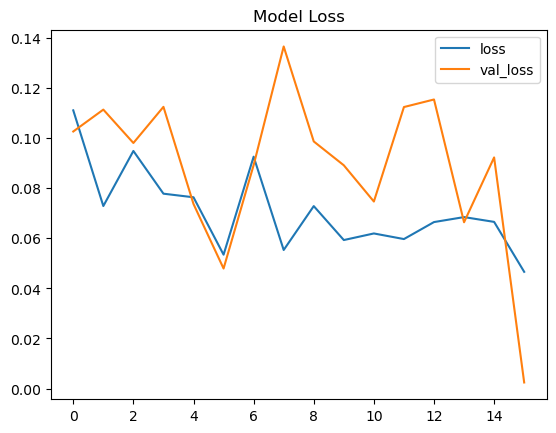

In [9]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

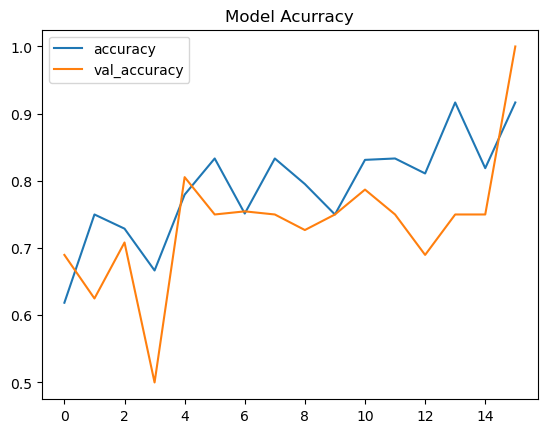

In [10]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [11]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 1.0
Loss: 0.0466160774230957, Val_Loss: 0.002429374260827899


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step


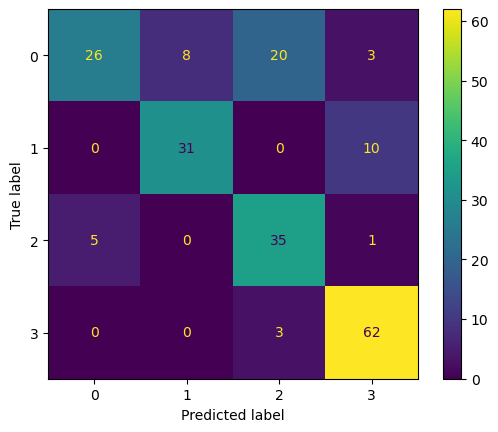

In [12]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [13]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


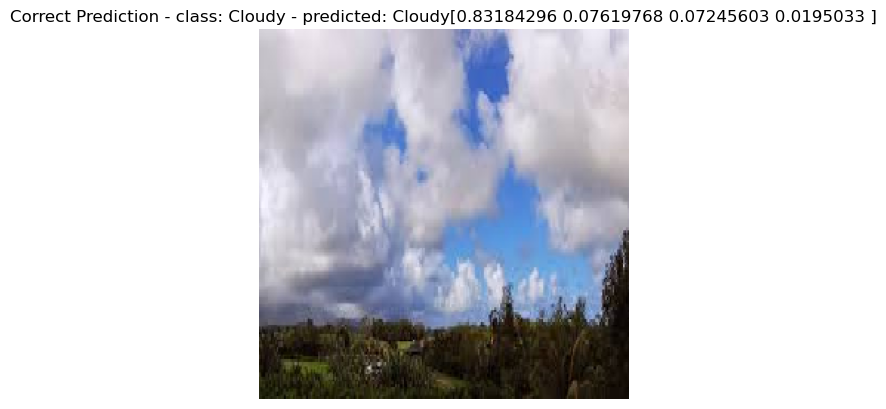

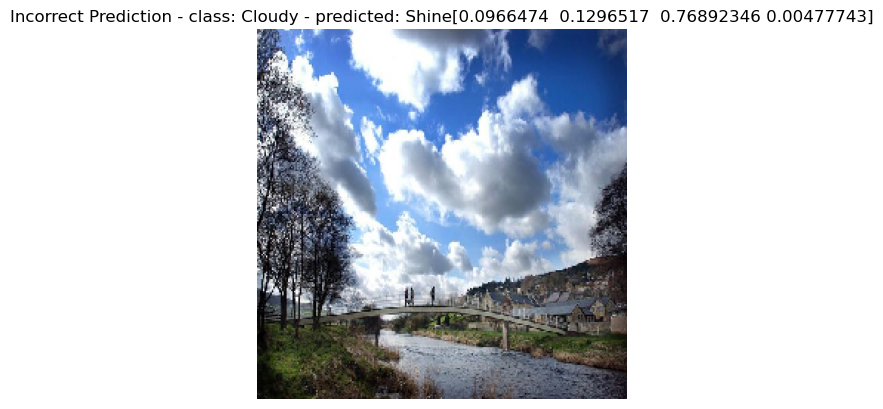

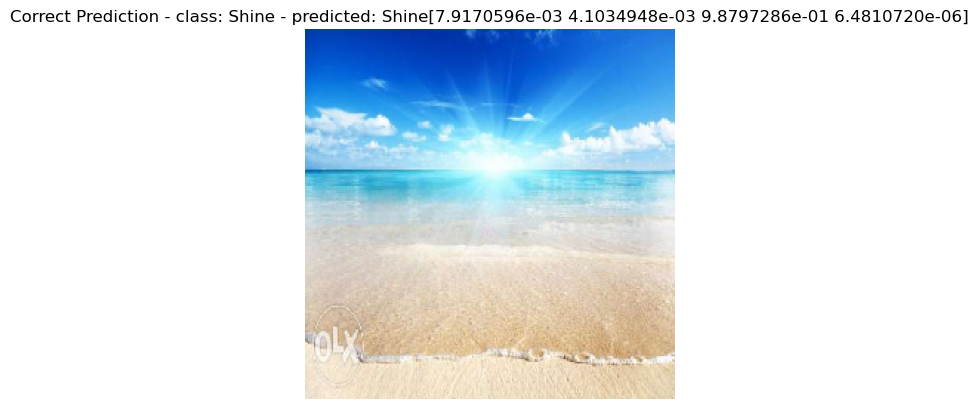

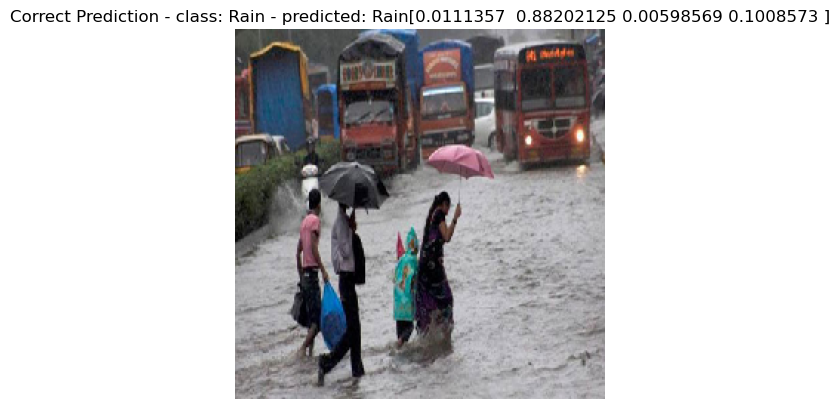

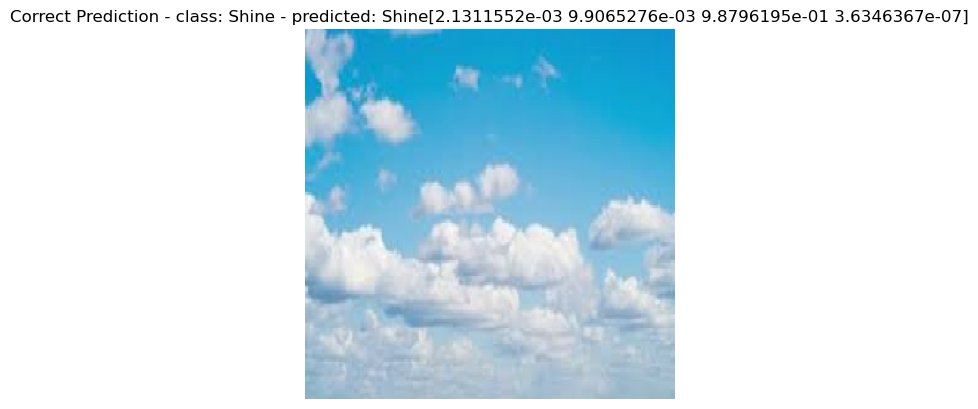

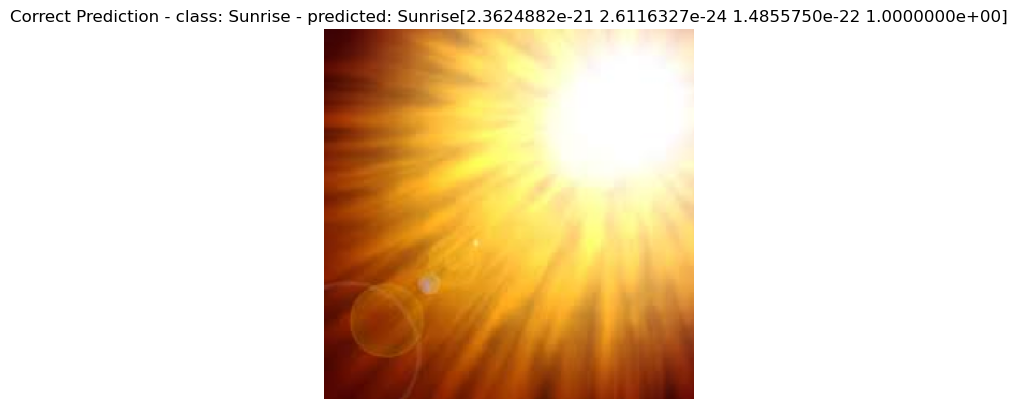

In [14]:
predict_one(model, 6) #<--you can show multiple pictures with this command. Just fill in the number you want to see.